## <font color='blue'> Homework 3 - Unsupervised Learning

### Online Computation

a)

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statistics

In [2]:
data = np.loadtxt('data.txt')

In [6]:
print(len(data))
data[:10]

5000


array([-1125., -1250., -1209., -1637., -1787., -1810., -1839., -1668.,
       -1283., -1411.])

In [32]:
## online computation
u = 0 #mean 
for t in range(len(data)):
    x = data[t]
    u = (1 - 1 / (t+1)) * u + (1 / (t+2) * x ) #add 1 since t starts at 0

In [33]:
print(u)

2991167.0655054953


In [34]:
#true mean 
true_mean = sum(data) / len(data)
print(true_mean)

2991834.6734


#### The online computation is 2991167 and the true mean is 2991834. The percentage difference is 0.02% which is not sigificant. 

b)

In [35]:
## plotting internediate means
u = 0 #mean 
means = []
for t in range(len(data)):
    x = data[t]
    u = (1 - 1 / (t+1)) * u + (1 / (t+2) * x )
    means.append(u)

In [36]:
means[:10]

[-562.5,
 -697.9166666666666,
 -767.5277777777778,
 -903.0458333333333,
 -1020.27,
 -1108.7964285714286,
 -1180.2719387755103,
 -1218.0712797619049,
 -1211.0300264550265,
 -1218.1997510822512]

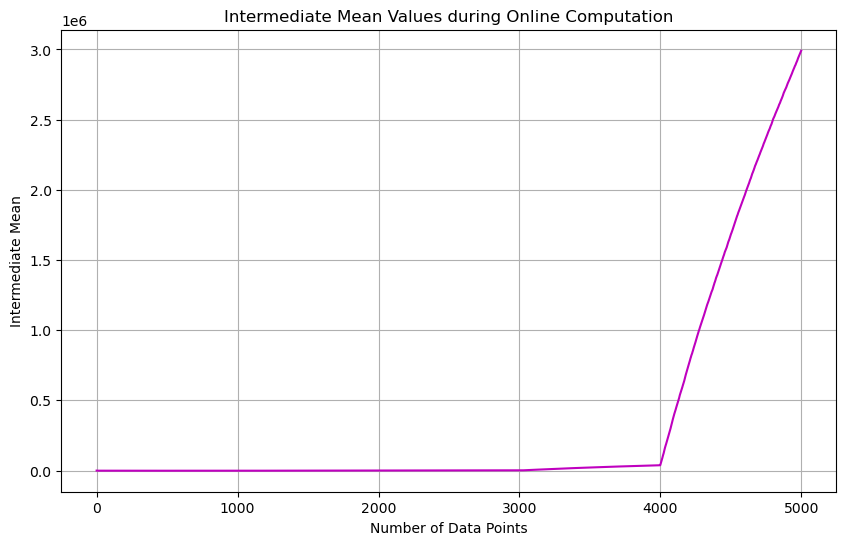

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(data)), means, color='m')
plt.xlabel('Number of Data Points')
plt.ylabel('Intermediate Mean')
plt.title('Intermediate Mean Values during Online Computation')
plt.grid(True)
plt.show()

2)

a)

Pseudocode for Online Algorithm

Input : An infinite sequence of inputs x_1, x_2, ... , x_inf
Output: The variance until the current point t.

Set mean = 0
Set ex2 = 0
For t = 1,2,3 ... : 
    Get new x.
   
   Update mean : (1- (1/t)*previous mean) + 1/t * new x)
    Update E[x^2]: (1 - 1/t) * ex2 + (1/t) * (x^2)
    We will have to solve for the mean and E[x^2] to get variance.
    
   Compute varx = ex2 - mean^2
Output varx as the variance until point t

b) 

In [38]:
u = 0 #mean 
ex2 = 0
for t in range(len(data)):
    x = data[t]
    u = (1 - 1 / (t+1)) * u + (1 / (t+2) * x ) #t starts at 0-add 1
    ex2 = (1 - 1 / (t+1)) * ex2 + (1 / (t+2) * (x**2) )
    varx = ex2 - u**2

In [39]:
print(varx)

36612793342689.12


In [40]:
variance = np.var(data)
print(variance)

36618966207041.94


#### The online computation is 36612793342689.12 and the true mean is 36618966207041.94. The percentage difference is 0.016% which is not sigificant. 

### Maintaining a random subset

a) 

In [42]:
median = np.median(data)
print(median)

1526.0


b)

In [50]:
num_repetitions = 10
k = 100
medians = []

for i in range(num_repetitions):
    x = np.random.choice(data, size=k, replace=True)
    median = np.median(x)
    medians.append(median)  

In [51]:
print(medians)

[1541.5, 1707.5, 1215.5, 1515.0, 1412.5, 1508.5, 1599.0, 1884.5, 1338.5, 1516.5]


c)

In [52]:
k = 500
medians = []

for i in range(num_repetitions):
    x = np.random.choice(data, size=k, replace=True)
    median = np.median(x)
    medians.append(median)  

In [53]:
print(medians)

[1523.0, 1350.5, 1520.0, 1634.0, 1587.0, 1518.5, 1484.5, 1584.0, 1618.0, 1386.5]


### Heavy Hitters

In [54]:
e = 0.05 
most_heavy_hitters = 1/e 

In [55]:
print(most_heavy_hitters)

20.0


#### This comes from heavy hitters <= 1/e